In [1]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps

import statsmodels.api as sm
import statsmodels.formula.api as smf

import geopandas as gpd

In [2]:
df = pd.read_csv('coursework_1_data_2019.csv')

## 1. Data exploration

In [3]:
print(df.shape)

(152, 28)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

In [5]:
df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


In [6]:
df.isna().sum()

local_authority_area    0
2008_cases_total        0
2013_cases_total        0
2018_cases_total        0
2008_pop_total          0
2013_pop_total          0
2018_pop_total          0
2008_cases_male         0
2013_cases_male         0
2018_cases_male         0
2008_pop_male           0
2013_pop_male           0
2018_pop_male           0
2008_cases_female       0
2013_cases_female       0
2018_cases_female       0
2008_pop_female         0
2013_pop_female         0
2018_pop_female         0
total_budget            0
clean_air               0
clean_environ           0
health_training         0
school_awareness        0
media_awareness         0
sub_counselling         0
region                  0
local_authority_type    0
dtype: int64

In [7]:
df.isna().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
147    0
148    0
149    0
150    0
151    0
Length: 152, dtype: int64

In [8]:
df.describe()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,...,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02,1.520000e+02,152.000000,152.000000,152.000000,152.00000,...,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1075.296053,1159.513158,1278.605263,3.409223e+05,3.542821e+05,3.682895e+05,375.796053,401.526316,438.276316,166914.75000,...,174007.565789,182291.480263,191112.500000,2.703092e+05,59368.421053,68427.631579,25111.842105,62631.578947,32967.105263,21802.631579
std,922.378705,997.231047,1069.691997,2.621354e+05,2.788745e+05,2.945969e+05,323.560804,353.756510,376.478018,128635.27204,...,133527.499451,142585.690264,149675.481541,2.104618e+05,53980.948836,62114.997173,22815.281663,55056.104342,29930.253972,19832.423607
min,5.000000,1.000000,4.000000,2.200000e+03,2.385000e+03,2.440000e+03,2.000000,0.000000,1.000000,1085.00000,...,1115.000000,1080.000000,1014.000000,2.000000e+03,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000
25%,493.500000,531.750000,592.500000,1.894748e+05,1.880672e+05,1.934285e+05,175.750000,183.250000,198.250000,93000.25000,...,95983.750000,99307.250000,101902.750000,1.400000e+05,26000.000000,32000.000000,11750.000000,31750.000000,14000.000000,9000.000000
50%,729.000000,794.500000,873.500000,2.540925e+05,2.577715e+05,2.642035e+05,266.000000,271.000000,293.500000,122694.00000,...,128675.500000,135104.000000,140668.500000,2.000000e+05,41500.000000,48000.000000,18000.000000,45000.000000,25000.000000,16000.000000
75%,1386.000000,1470.250000,1641.500000,3.751225e+05,4.024990e+05,4.094285e+05,473.750000,519.250000,554.750000,183610.00000,...,191395.500000,197497.750000,213147.750000,3.017500e+05,70000.000000,79000.000000,26500.000000,69750.000000,39750.000000,27250.000000
max,5065.000000,5582.000000,5745.000000,1.411380e+06,1.528154e+06,1.623387e+06,1762.000000,2065.000000,2000.000000,694681.00000,...,716699.000000,773508.000000,832527.000000,1.170000e+06,297000.000000,333000.000000,130000.000000,340000.000000,203000.000000,99000.000000


In [9]:
df.region.value_counts()

London                      33
North West                  23
South East                  19
South West                  16
Yorkshire and the Humber    15
West Midlands               14
North East                  12
East of England             11
East Midlands                9
Name: region, dtype: int64

We see that there is data for 152 local authority areas from 9 regions presented in the dataset.

In [10]:
#Is the budget just a sum of obesity-related spendings?

df['budgets_sum'] = df['clean_air'] + df['clean_environ'] + df['health_training'] + df['school_awareness']\
    + df['media_awareness'] + df['sub_counselling']

df[df['total_budget'] != df['budgets_sum']]

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,budgets_sum


In [11]:
df.drop(['budgets_sum'], axis=1, inplace=True)

Yes, the budget is the sum of obesity-related spendings. 

?Thus for the further multiple regression analysis we will only be using specific expenditures without using total budgets?  
Check multicollinearity

## 2. Data preparation

In [12]:
# Normalise obesity cases per population and calculate the rates of changes.

df['2008_cases_normalised'] = (df['2008_cases_total']*100000/df['2008_pop_total']).round(2)
df['2018_cases_normalised'] = (df['2018_cases_total']*100000/df['2018_pop_total']).round(2)

df['cases_change_rate'] = (df['2018_cases_normalised'] - df['2008_cases_normalised'])/df['2008_cases_normalised']

In [111]:
# df[['local_authority_area','cases_change']].to_csv('cases_change.csv', index=False)

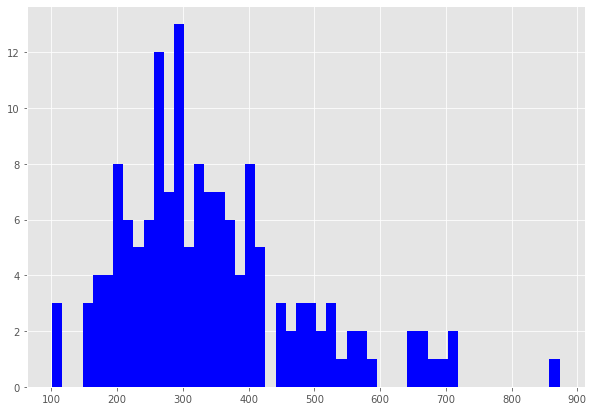

In [13]:
df['2018_cases_normalised'].hist(bins=50, color='blue', figsize=(10,7));

In [14]:
df['cases_change_rate'].describe()

count    152.000000
mean       0.136570
std        0.122324
min       -0.278699
25%        0.059058
50%        0.099522
75%        0.203963
max        0.662874
Name: cases_change_rate, dtype: float64

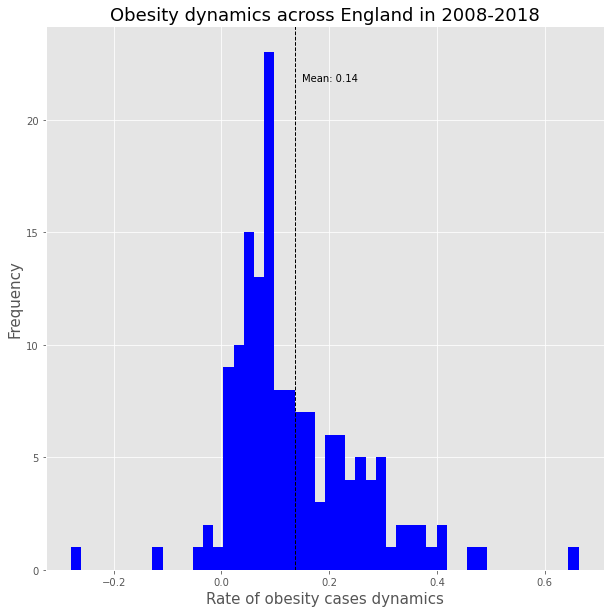

In [16]:
fig = df['cases_change_rate'].hist(bins=50, color='blue', figsize=(10,10))
plt.xlabel("Rate of obesity cases dynamics", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.axvline(df['cases_change_rate'].mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(df['cases_change_rate'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['cases_change_rate'].mean()))


plt.title("Obesity dynamics across England in 2008-2018", fontsize=18);

In [17]:
df[['local_authority_area','region','cases_change_rate']].sort_values(by='cases_change_rate')

,local_authority_area,region,cases_change_rate
59,Isles of Scilly,South West,-0.278699
105,Rutland,East Midlands,-0.127163
80,Milton Keynes,South East,-0.038405
145,Wiltshire,South West,-0.032727
132,Torbay,South West,-0.021149
...,...,...,...
16,Bromley,London,0.408943
78,Merton,London,0.417738
61,Kensington and Chelsea,London,0.472105
64,Kingston upon Thames,London,0.474586


In [112]:
print(len(df[df['cases_change_rate'] >0]))
print(len(df[df['cases_change_rate'] ==0]))
print(len(df[df['cases_change_rate'] <0]))

147
0
5


In [179]:
df[df['cases_change_rate'] <0]

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,budgets_sum,2008_cases_normalised,2018_cases_normalised,cases_change_rate
59,Isles of Scilly,5,1,4,2200,2385,2440,2,0,1,...,0,2000,0,0,South West,unitary_authority,2000,227.27,163.93,-0.278699
80,Milton Keynes,839,869,867,234508,246600,252016,314,327,295,...,23000,77000,9000,19000,South East,unitary_authority,210000,357.77,344.03,-0.038405
105,Rutland,88,102,86,38363,39872,42952,28,23,26,...,8000,14000,5000,2000,East Midlands,unitary_authority,51000,229.39,200.22,-0.127163
132,Torbay,615,622,633,134925,136936,141873,169,173,200,...,15000,16000,16000,10000,South West,unitary_authority,121000,455.81,446.17,-0.021149
145,Wiltshire,1372,1474,1516,457236,493515,522318,472,520,521,...,11000,125000,29000,46000,South West,unitary_authority,380000,300.06,290.24,-0.032727


Overall the amount of child obesity cases has grown in most of the areas. It is only 5 local areas 

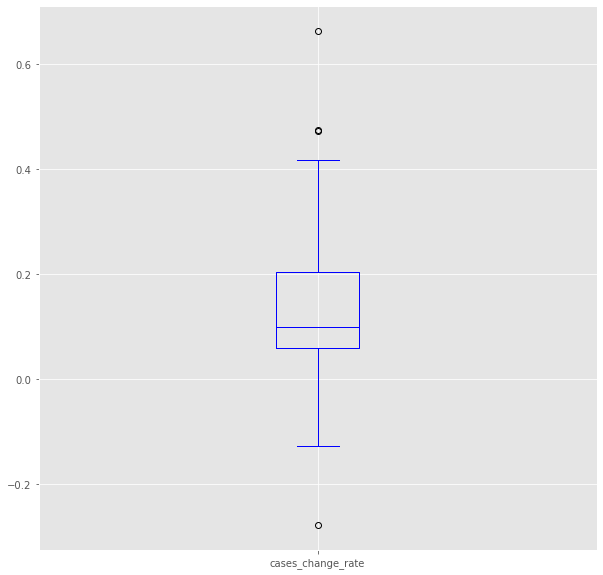

In [78]:
df.boxplot(column=['cases_change_rate'], color='blue', figsize=[10,10]);

In [187]:
df.columns

Index(['local_authority_area', 'total_budget', 'local_authority_type',
       '2008_cases_normalised', '2018_cases_normalised', 'cases_change_rate',
       'pop_mean', 'budget_norm', 'air_norm', 'environ_norm',
       'health_training_norm', 'school_norm', 'media_norm',
       'counselling_norm'],
      dtype='object')

In [18]:
df['pop_mean'] = (df['2008_pop_total']+ df['2018_pop_total'])/2

df['budget_norm'] = df['total_budget']*1.0/df['pop_mean']
df['air_norm'] = df['clean_air']*1.0/df['pop_mean']
df['environ_norm'] = df['clean_environ']*1.0/df['pop_mean']
df['health_training_norm'] = df['health_training']*1.0/df['pop_mean']
df['school_norm'] = df['school_awareness']*1.0/df['pop_mean']
df['media_norm'] = df['media_awareness']*1.0/df['pop_mean']
df['counselling_norm'] = df['sub_counselling']*1.0/df['pop_mean']

df.drop(['2008_cases_total', '2013_cases_total',
       '2018_cases_total', '2008_pop_total', '2013_pop_total',
       '2018_pop_total', '2008_cases_male', '2013_cases_male',
       '2018_cases_male', '2008_pop_male', '2013_pop_male', '2018_pop_male',
       '2008_cases_female', '2013_cases_female', '2018_cases_female',
       '2008_pop_female', '2013_pop_female', '2018_pop_female',
        'clean_air', 'clean_environ', 'health_training', 'school_awareness',
       'media_awareness', 'sub_counselling', 'region'
        ], axis=1, inplace=True)

In [19]:
df['budget_norm'].describe()

count    152.000000
mean       0.799301
std        0.363906
min        0.622073
25%        0.716815
50%        0.772372
75%        0.819077
max        5.132153
Name: budget_norm, dtype: float64

In [20]:
df['budget_norm'].var()

0.13242731062355126

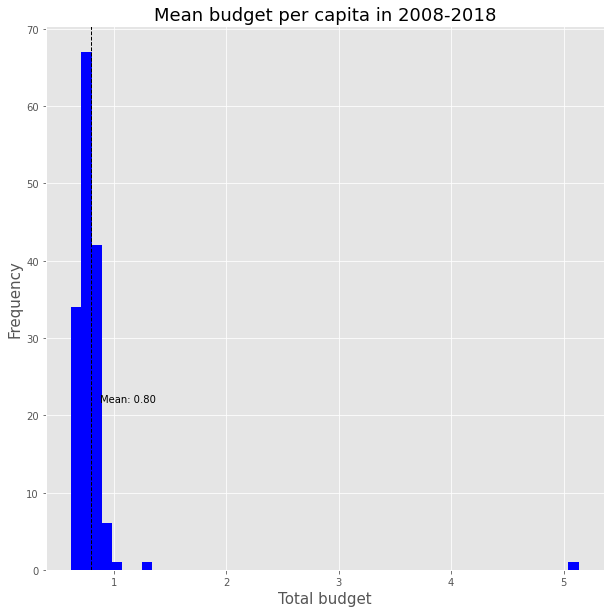

In [21]:
fig = df['budget_norm'].hist(bins=50, color='blue', figsize=(10,10))
plt.xlabel("Total budget", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.axvline(df['budget_norm'].mean(), color='k', linestyle='dashed', linewidth=1)

# min_ylim, max_ylim = plt.ylim()
plt.text(df['budget_norm'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df['budget_norm'].mean()))


plt.title("Mean budget per capita in 2008-2018", fontsize=18);

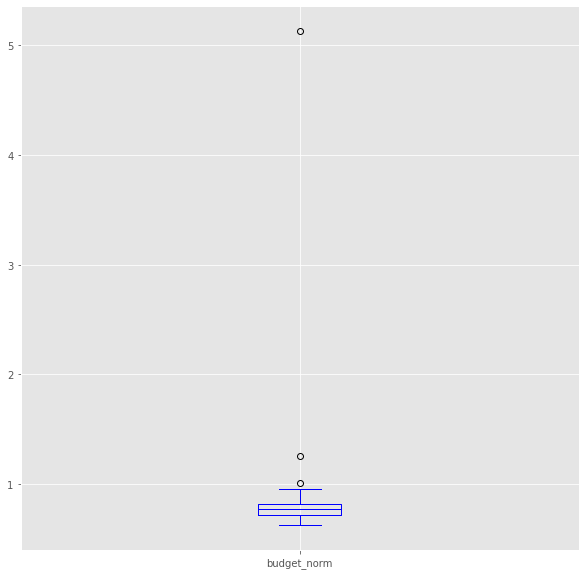

In [22]:
df.boxplot(column=['budget_norm'], color='blue', figsize=[10,10]);

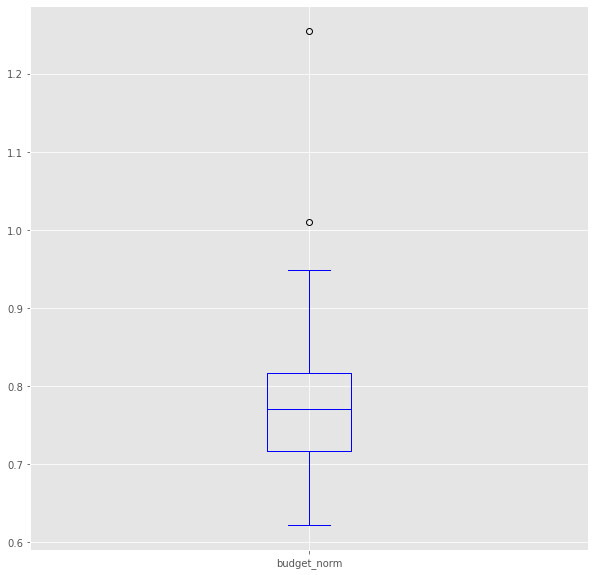

In [23]:
df[df.local_authority_area!="City of London"].boxplot(column=['budget_norm'], color='blue', figsize=[10,10]);

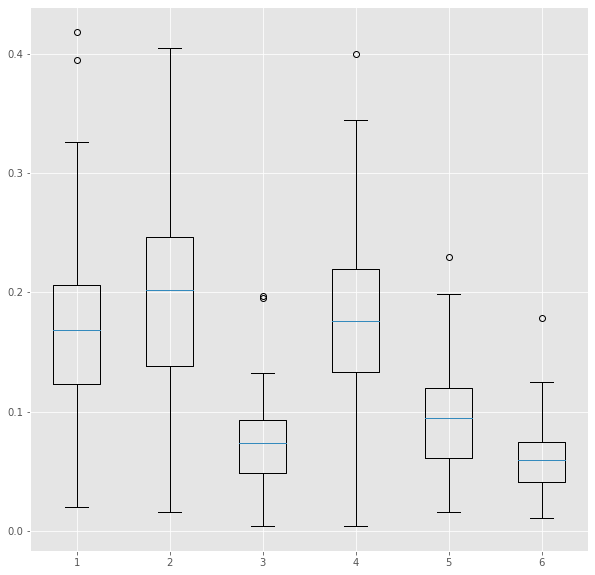

In [68]:
fig = plt.figure(1, figsize=(10, 10))
box_plot_data=[df['air_norm'],df['environ_norm'],df['health_training_norm'],df['school_norm'], df['media_norm'],df['counselling_norm']]
plt.boxplot(box_plot_data)

plt.show()

In [25]:
df = df[df.local_authority_area!="City of London"]

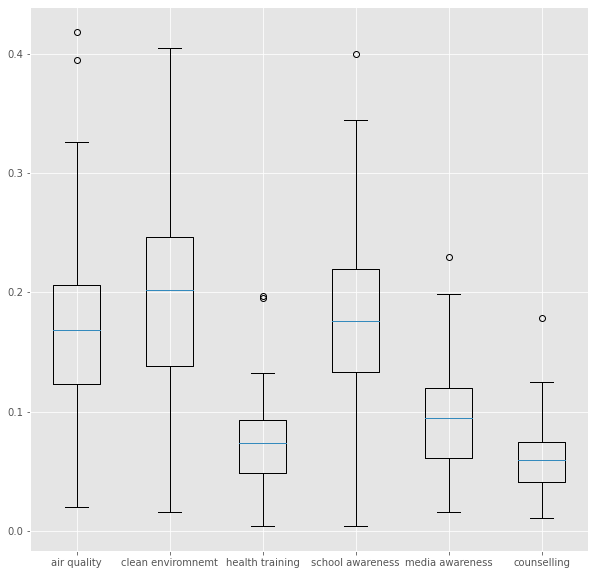

In [69]:
fig = plt.figure(1, figsize=(10, 10))
box_plot_data=[df['air_norm'],df['environ_norm'],df['health_training_norm'],df['school_norm'], df['media_norm'],df['counselling_norm']]
plt.boxplot(box_plot_data)
plt.xticks([1, 2, 3,4,5,6], ['air quality', 'clean enviromnemt', 'health training', 'school awareness', 'media awareness', 'counselling'])

plt.show()

In [27]:
df.sort_values(by='school_norm', ascending = False)

,local_authority_area,total_budget,local_authority_type,2008_cases_normalised,2018_cases_normalised,cases_change_rate,pop_mean,budget_norm,air_norm,environ_norm,health_training_norm,school_norm,media_norm,counselling_norm
59,Isles of Scilly,2000,unitary_authority,227.27,163.93,-0.278699,2320.0,0.862069,0.000000,0.000000,0.000000,0.862069,0.000000,0.000000
81,Newcastle upon Tyne,220000,metropolitan_borough,172.67,206.91,0.198297,280014.5,0.785674,0.049997,0.092852,0.071425,0.399979,0.096424,0.074996
105,Rutland,51000,unitary_authority,229.39,200.22,-0.127163,40657.5,1.254381,0.418127,0.122979,0.196766,0.344340,0.122979,0.049191
20,Cambridgeshire,551000,non_metropolitan_county,256.80,257.37,0.002220,635354.5,0.867232,0.234515,0.015739,0.132210,0.336820,0.099157,0.048792
80,Milton Keynes,210000,unitary_authority,357.77,344.03,-0.038405,243262.0,0.863267,0.119213,0.217872,0.094548,0.316531,0.036997,0.078105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Bedford,130000,unitary_authority,196.61,215.30,0.095061,164324.0,0.791120,0.225165,0.316448,0.103454,0.048684,0.018257,0.079112
89,Northamptonshire,590000,non_metropolitan_county,445.98,465.92,0.044711,717651.5,0.822126,0.326064,0.110081,0.121229,0.047377,0.098934,0.118442
26,Cornwall,411000,unitary_authority,563.38,594.29,0.054865,565692.0,0.726544,0.245717,0.256323,0.017677,0.035355,0.111368,0.060103
11,Bracknell Forest,90000,unitary_authority,161.17,215.79,0.338897,116247.5,0.774210,0.301082,0.215058,0.077421,0.034409,0.111830,0.034409


In [28]:
df = df[df.local_authority_area!="Isles of Scilly"]

In [29]:
df.shape

(150, 14)

We find the outlier, remove it and then redo the linear regression again

## 3. Pearson correlation

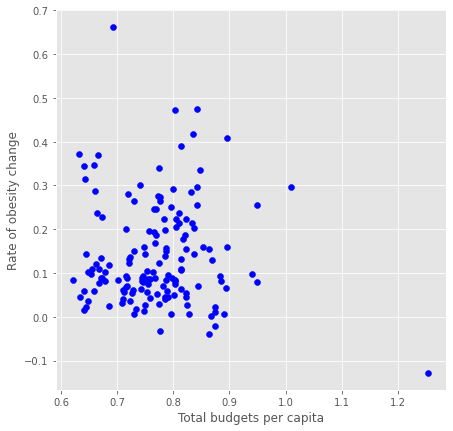

In [32]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['budget_norm'], df['cases_change_rate'], color='blue')
plt.xlabel('Total budgets per capita')
plt.ylabel('Rate of obesity change')
plt.show()

In [33]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['budget_norm'], df['cases_change_rate'])
round(corr, 3)

-0.051

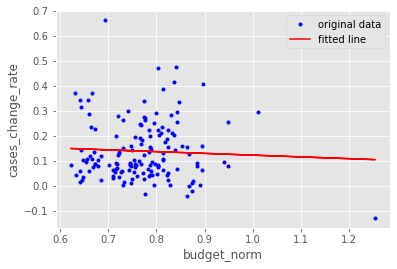

y = -0.0703 x + 0.194
Rsq =  0.0025922012133675516
p-value =  0.5360826530555804


In [35]:
#Tried to investigate the influence of total budgets on the amount of cases. To to do, we use simple regression.

X = df['budget_norm']
Y = df['cases_change_rate']

plt.xlabel('budget_norm')
plt.ylabel('cases_change_rate')

a = plt.plot(X,Y,'.', label='original data', color='blue')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,5), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

## 4. Var correlation

In [37]:
df.corr()

,total_budget,2008_cases_normalised,2018_cases_normalised,cases_change_rate,pop_mean,budget_norm,air_norm,environ_norm,health_training_norm,school_norm,media_norm,counselling_norm
total_budget,1.000000,0.024108,-0.016318,-0.241560,0.988127,-0.016386,0.017897,0.027928,-0.079219,-0.054673,-0.000250,0.057373
2008_cases_normalised,0.024108,1.000000,0.984868,-0.483622,0.041252,-0.088032,-0.047697,-0.112466,-0.030758,0.020173,0.061340,0.053472
2018_cases_normalised,-0.016318,0.984868,1.000000,-0.341480,0.000525,-0.095992,-0.073535,-0.100329,-0.042243,-0.002717,0.101868,0.068388
cases_change_rate,-0.241560,-0.483622,-0.341480,1.000000,-0.242098,-0.050914,-0.091439,0.092736,-0.051369,-0.127478,0.123307,-0.003972
pop_mean,0.988127,0.041252,0.000525,-0.242098,1.000000,-0.129887,-0.012830,-0.008349,-0.104629,-0.083735,-0.037417,0.035232
budget_norm,-0.016386,-0.088032,-0.095992,-0.050914,-0.129887,1.000000,0.378886,0.223612,0.308249,0.281611,0.201044,0.216257
air_norm,0.017897,-0.047697,-0.073535,-0.091439,-0.012830,0.378886,1.000000,-0.210440,-0.011901,-0.162857,-0.177669,-0.091998
environ_norm,0.027928,-0.112466,-0.100329,0.092736,-0.008349,0.223612,-0.210440,1.000000,-0.077140,-0.433992,-0.164134,-0.148040
health_training_norm,-0.079219,-0.030758,-0.042243,-0.051369,-0.104629,0.308249,-0.011901,-0.077140,1.000000,0.028922,-0.055416,0.011107
school_norm,-0.054673,0.020173,-0.002717,-0.127478,-0.083735,0.281611,-0.162857,-0.433992,0.028922,1.000000,-0.012043,0.081151


In [38]:
independent_var = df.loc[:, ['air_norm','environ_norm','health_training_norm','school_norm','media_norm','counselling_norm']]
independent_var.columns = ['air','environ','health_training','school','media','counselling']

In [39]:
independent_var.corr()

,air,environ,health_training,school,media,counselling
air,1.000000,-0.210440,-0.011901,-0.162857,-0.177669,-0.091998
environ,-0.210440,1.000000,-0.077140,-0.433992,-0.164134,-0.148040
health_training,-0.011901,-0.077140,1.000000,0.028922,-0.055416,0.011107
school,-0.162857,-0.433992,0.028922,1.000000,-0.012043,0.081151
media,-0.177669,-0.164134,-0.055416,-0.012043,1.000000,0.111279
counselling,-0.091998,-0.148040,0.011107,0.081151,0.111279,1.000000


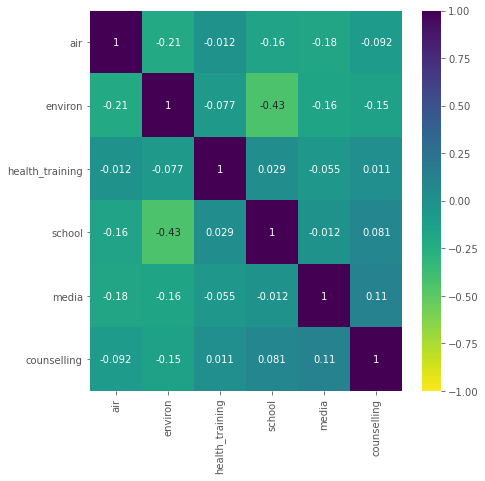

In [40]:
f, ax = plt.subplots(figsize=(7, 7))

corr_matrix = independent_var.corr()

sns.heatmap(corr_matrix,
            cmap='viridis_r',
            annot = True,
            vmin = -1,
            vmax = 1
           );

## 5. Multiple regression

In [41]:
multi_obesity_model = smf.ols(formula='cases_change_rate ~ air_norm + environ_norm + health_training_norm + school_norm +media_norm + counselling_norm',
                                   data=df).fit()
print(multi_obesity_model.summary())

                            OLS Regression Results                            
Dep. Variable:      cases_change_rate   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.059
Date:                Mon, 16 Nov 2020   Prob (F-statistic):              0.390
Time:                        15:05:18   Log-Likelihood:                 111.35
No. Observations:                 150   AIC:                            -208.7
Df Residuals:                     143   BIC:                            -187.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1769 

In [42]:
beta_0, beta_1, beta_2, beta_3, beta_4, beta_5, beta_6 = multi_obesity_model.params
rsq = multi_obesity_model.rsquared
pval_0, pval_1, pval_2, pval_3, pval_4, pval_5, pval_6 = multi_obesity_model.pvalues

print("y =", round(beta_1,3), "x1 +", round(beta_2,3), "x2 +", round(beta_3,3), "x3 +", round(beta_4,3), "x4 +",\
      round(beta_5,3), "x5 +", round(beta_6,3), "x6 +", round(beta_0,3))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))
print("p-value_3 = ", round(pval_3,3))
print("p-value_4 = ", round(pval_4,3))
print("p-value_5 = ", round(pval_5,3))
print("p-value_6 = ", round(pval_6,3))

y = -0.146 x1 + 0.055 x2 + -0.142 x3 + -0.222 x4 + 0.316 x5 + -0.039 x6 + 0.177
R^2     =  0.04255168047258495
p-value_1 =  0.35
p-value_2 =  0.726
p-value_3 =  0.629
p-value_4 =  0.204
p-value_5 =  0.202
p-value_6 =  0.918


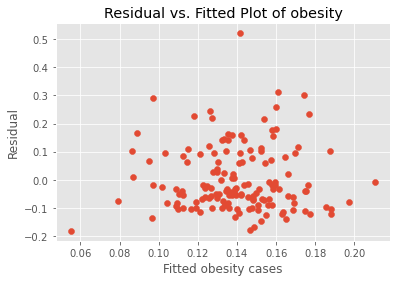

In [43]:
# plot 
plt.scatter(multi_obesity_model.fittedvalues, multi_obesity_model.resid)
plt.xlabel('Fitted obesity cases')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of obesity')
plt.show()

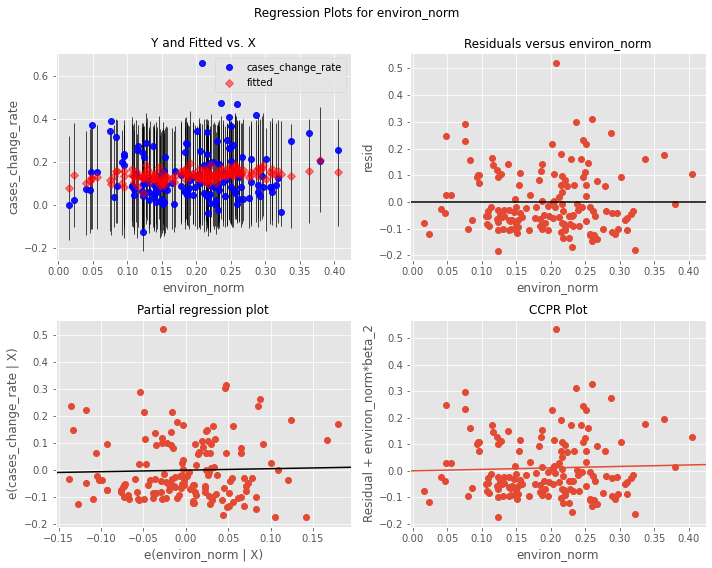

In [44]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_obesity_model, 'environ_norm', fig=fig)

## Maps

In [45]:
gdf = gpd.read_file('Counties_and_Unitary_Authorities__December_2016__Boundaries.geojson')

In [46]:
gdf.columns

Index(['objectid', 'ctyua16cd', 'ctyua16nm', 'ctyua16nmw', 'bng_e', 'bng_n',
       'long', 'lat', 'st_areashape', 'st_lengthshape', 'geometry'],
      dtype='object')

In [47]:
gdf = gdf.loc[:, ['ctyua16nm','geometry']]
gdf = gdf.rename(columns = {'ctyua16nm':'area_name'})

In [48]:
gdf_joined = gdf.join(df, how='right', lsuffix='area_name', rsuffix='local_authority_area')

In [49]:
gdf_joined[gdf_joined['area_name'].isnull()]

,area_name,geometry,local_authority_area,total_budget,local_authority_type,2008_cases_normalised,2018_cases_normalised,cases_change_rate,pop_mean,budget_norm,air_norm,environ_norm,health_training_norm,school_norm,media_norm,counselling_norm


In [50]:
gdf_joined.shape

(150, 16)

(-6.827733107931266, 2.1726809166597882, 49.56735966113136, 56.108388023988155)

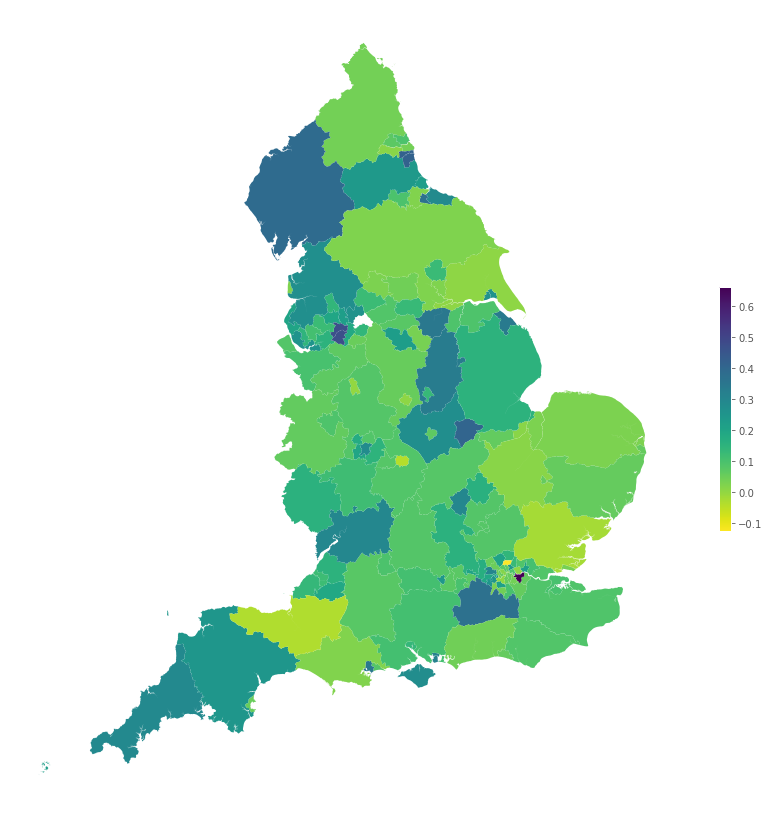

In [67]:
fig, ax = plt.subplots(1, figsize=(15, 15))

gdf_joined.plot(column='cases_change_rate', 
                ax=ax, cmap='viridis_r',
                legend=True,
                  legend_kwds={'shrink': 0.3},
                classification_kwds=dict(bins=[0,0.1,0.2,0.3,0.4, 0.5])
               );
ax.axis('off')